<a href="https://colab.research.google.com/github/lmhoang47/CS2225.CH1501/blob/taivct_lab03/FaceDetectionFromWebCam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face detection from Webcam

## Prepare

Clone opencv repo:

In [1]:
!git clone https://github.com/opencv/opencv.git

Cloning into 'opencv'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 279444 (delta 1), reused 6 (delta 0), pack-reused 279412
Receiving objects: 100% (279444/279444), 472.72 MiB | 28.20 MiB/s, done.
Resolving deltas: 100% (195249/195249), done.
Checking out files: 100% (6582/6582), done.


Create a function to capture image from webcam:

In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

## Take picture from webcam

Run the following code to take a picture from webcam:

<IPython.core.display.Javascript object>

Captured image to imageMon Sep 21 13:52:03 2020.jpg
Display the original image:imageMon Sep 21 13:52:03 2020.jpg


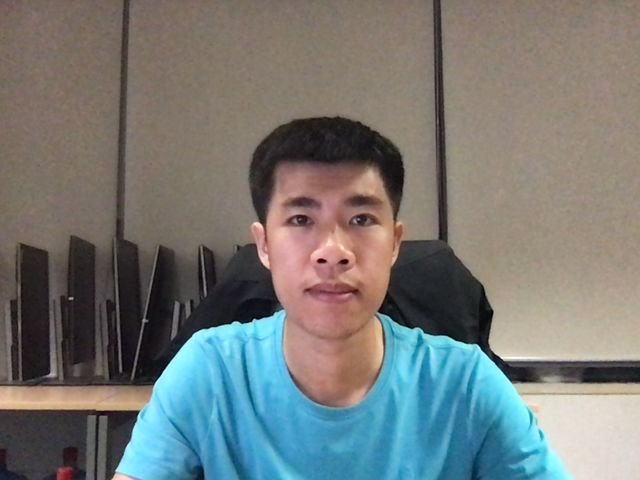

In [3]:
from IPython.display import Image
import time

# Take picture
filename = "image" + time.ctime() + ".jpg"
original_img = take_photo(filename)
print('Captured image to {}'.format(original_img))
  
# Show the image which was just taken.
print("Display the original image:" + filename)
display(Image(original_img))

## Detect face:

Detecting face ...


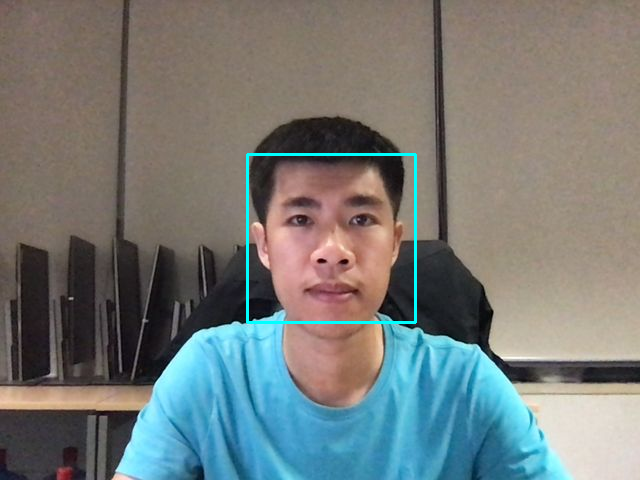

In [4]:
import cv2
from google.colab.patches import cv2_imshow

# Load classifier
print("Detecting face ...")
face_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml') 
detected_img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)

# Detects faces
faces = face_cascade.detectMultiScale(detected_img, 1.3, 5)

for (x,y,w,h) in faces: 
  cv2.rectangle(detected_img,(x,y),(x+w,y+h),(255,255,0),2)

# Display
cv2_imshow(detected_img)